<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(2_4)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_2.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2.4_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,88.377247,39.491169,20.118186,58.603236,-126.305789,90.284050,180.593742,-90.309692
1,0.0,1.0,76.230454,42.287437,27.782041,88.623428,34.048021,278.971382,228.650485,50.320897
2,0.0,2.0,42.963319,69.699350,69.761851,32.548430,22.302234,247.275184,247.908757,-0.633573
3,0.0,3.0,67.550424,98.122379,83.999103,58.180530,421.900709,739.753145,409.531770,330.221375
4,0.0,4.0,51.254482,23.341264,85.756436,52.421546,22.227492,245.001221,259.388578,-14.387358
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,35.622181,63.930649,89.288735,56.309236,-41.138338,214.012462,229.187092,-15.174630
59996,999.0,56.0,78.703059,20.514264,66.964189,57.999224,-103.200604,130.980131,221.293658,-90.313527
59997,999.0,57.0,65.343113,70.787796,66.302555,71.520061,48.917321,332.870846,245.286351,87.584495
59998,999.0,58.0,25.053210,93.303250,37.811074,68.115993,-64.800111,169.483417,172.403199,-2.919782


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    88.377247  39.491169  20.118186  58.603236 -126.305789   
      1.0    76.230454  42.287437  27.782041  88.623428   34.048021   
      2.0    42.963319  69.699350  69.761851  32.548430   22.302234   
      3.0    67.550424  98.122379  83.999103  58.180530  421.900709   
      4.0    51.254482  23.341264  85.756436  52.421546   22.227492   
...                ...        ...        ...        ...         ...   
999.0 55.0   35.622181  63.930649  89.288735  56.309236  -41.138338   
      56.0   78.703059  20.514264  66.964189  57.999224 -103.200604   
      57.0   65.343113  70.787796  66.302555  71.520061   48.917321   
      58.0   25.053210  93.303250  37.811074  68.115993  -64.800111   
      59.0   85.068261  21.871318  65.736544  63.517825   44.670758   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0     90.284050  180.593742  -90.309692  
      1.0    278.971382  228.650485   50.320897  
      2.0    247.275184  247.908757   -0.633573  
      3.0    739.753145  409.531770  330.221375  
      4.0    245.001221  259.388578  -14.387358  
...                 ...         ...         ...  
999.0 55.0   214.012462  229.187092  -15.174630  
      56.0   130.980131  221.293658  -90.313527  
      57.0   332.870846  245.286351   87.584495  
      58.0   169.483417  172.403199   -2.919782  
      59.0   290.864705  232.520186   58.344519  

[60000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    88.377247  39.491169  20.118186  58.603236 -126.305789   
      1.0    76.230454  42.287437  27.782041  88.623428   34.048021   
      2.0    42.963319  69.699350  69.761851  32.548430   22.302234   
      3.0    67.550424  98.122379  83.999103  58.180530  421.900709   
      4.0    51.254482  23.341264  85.756436  52.421546   22.227492   
...                ...        ...        ...        ...         ...   
999.0 55.0   35.622181  63.930649  89.288735  56.309236  -41.138338   
      56.0   78.703059  20.514264  66.964189  57.999224 -103.200604   
      57.0   65.343113  70.787796  66.302555  71.520061   48.917321   
      58.0   25.053210  93.303250  37.811074  68.115993  -64.800111   
      59.0   85.068261  21.871318  65.736544  63.517825   44.670758   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0     90.284050  180.593742  -90.309692  
      1.0    278.971382  228.650485   50.320897  
      2.0    247.275184  247.908757   -0.633573  
      3.0    739.753145  409.531770  330.221375  
      4.0    245.001221  259.388578  -14.387358  
...                 ...         ...         ...  
999.0 55.0   214.012462  229.187092  -15.174630  
      56.0   130.980131  221.293658  -90.313527  
      57.0   332.870846  245.286351   87.584495  
      58.0   169.483417  172.403199   -2.919782  
      59.0   290.864705  232.520186   58.344519  

[60000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,88.377247,39.491169,20.118186,58.603236,-126.305789,90.284050,180.593742,-90.309692
1,0.0,1.0,76.230454,42.287437,27.782041,88.623428,34.048021,278.971382,228.650485,50.320897
2,0.0,2.0,42.963319,69.699350,69.761851,32.548430,22.302234,247.275184,247.908757,-0.633573
3,0.0,3.0,67.550424,98.122379,83.999103,58.180530,421.900709,739.753145,409.531770,330.221375
4,0.0,4.0,51.254482,23.341264,85.756436,52.421546,22.227492,245.001221,259.388578,-14.387358
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,35.622181,63.930649,89.288735,56.309236,-41.138338,214.012462,229.187092,-15.174630
59996,999.0,56.0,78.703059,20.514264,66.964189,57.999224,-103.200604,130.980131,221.293658,-90.313527
59997,999.0,57.0,65.343113,70.787796,66.302555,71.520061,48.917321,332.870846,245.286351,87.584495
59998,999.0,58.0,25.053210,93.303250,37.811074,68.115993,-64.800111,169.483417,172.403199,-2.919782


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4           e  \
rep   index                                                           
0.0   0.0    88.377247  39.491169  20.118186  58.603236 -126.305789   
      1.0    76.230454  42.287437  27.782041  88.623428   34.048021   
      2.0    42.963319  69.699350  69.761851  32.548430   22.302234   
      3.0    67.550424  98.122379  83.999103  58.180530  421.900709   
      4.0    51.254482  23.341264  85.756436  52.421546   22.227492   
...                ...        ...        ...        ...         ...   
999.0 55.0   35.622181  63.930649  89.288735  56.309236  -41.138338   
      56.0   78.703059  20.514264  66.964189  57.999224 -103.200604   
      57.0   65.343113  70.787796  66.302555  71.520061   48.917321   
      58.0   25.053210  93.303250  37.811074  68.115993  -64.800111   
      59.0   85.068261  21.871318  65.736544  63.517825   44.670758   

                      Y       y_hat       e_hat  
rep   index                                      
0.0   0.0     90.284050  180.593742  -90.309692  
      1.0    278.971382  228.650485   50.320897  
      2.0    247.275184  247.908757   -0.633573  
      3.0    739.753145  409.531770  330.221375  
      4.0    245.001221  259.388578  -14.387358  
...                 ...         ...         ...  
999.0 55.0   214.012462  229.187092  -15.174630  
      56.0   130.980131  221.293658  -90.313527  
      57.0   332.870846  245.286351   87.584495  
      58.0   169.483417  172.403199   -2.919782  
      59.0   290.864705  232.520186   58.344519  

[60000 rows x 8 columns]

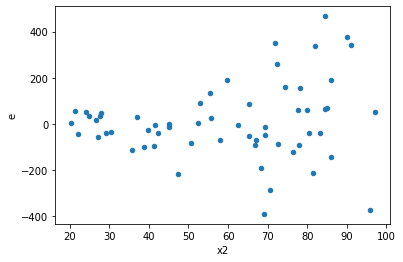

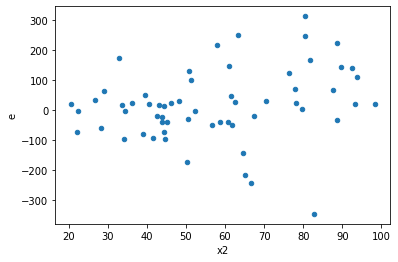

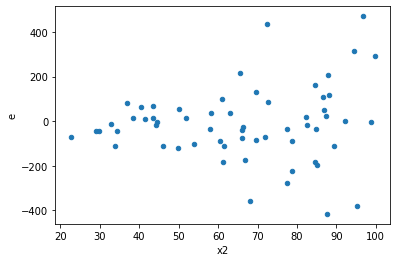

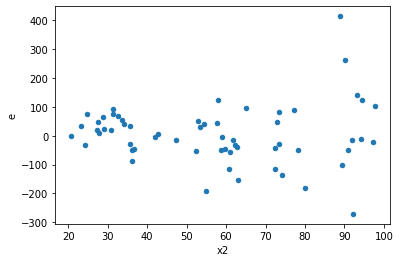

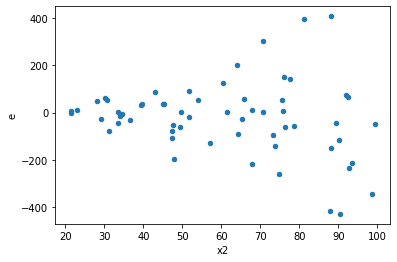

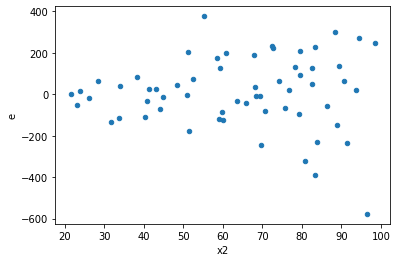

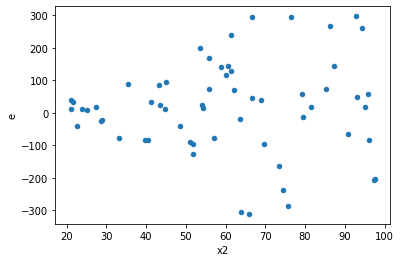

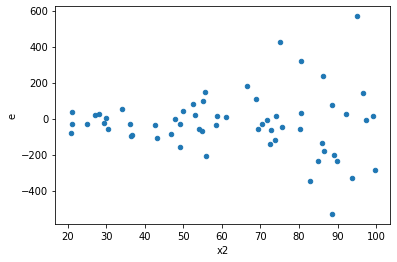

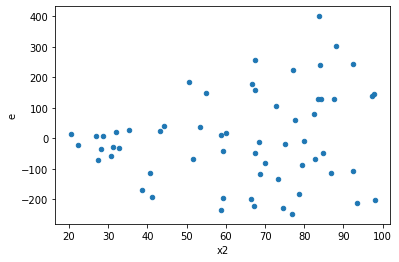

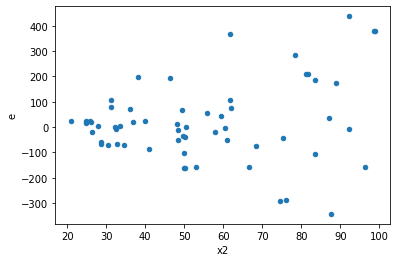

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,27.0,25.0,475522.9332419762,1087249.572124339,17611.960490443562,43489.98288497356,2.4693436547607344,0.025961154622740512,0.9870194226886297,0.012980577311370256,Reject005=0 : Heteroscedasticity
5.0,20.0,32.0,288705.9783164034,889057.7565484383,14435.29891582017,27783.054892138698,1.9246608646039352,0.0956344994850431,0.9521827502574784,0.04781724974252155,Reject005=1 : Homoscedasticity
6.0,25.0,27.0,561332.3789197447,844315.2392442399,22453.29515678979,31270.9347868237,1.3927102711856298,0.40048006173242445,0.7997599691337878,0.20024003086621223,Reject005=1 : Homoscedasticity
8.0,30.0,22.0,617957.70257502,555241.9697686143,20598.590085834,25238.27135311883,1.225242662141018,0.6288864435304833,0.6855567782347584,0.31444322176524164,Reject005=1 : Homoscedasticity
10.0,27.0,25.0,155250.39383665126,1069102.7093101968,5750.014586542639,42764.10837240787,7.437217372020792,3.113109411367887e-06,0.9999984434452943,1.5565547056839435e-06,Reject005=0 : Heteroscedasticity
11.0,34.0,18.0,297209.8559246675,423191.14154823427,8741.466350725515,23510.618974901903,2.689550932487499,0.028890858700365785,0.9855545706498171,0.014445429350182892,Reject005=0 : Heteroscedasticity
14.0,31.0,21.0,521987.16937534715,558352.338997057,16838.29578630152,26588.20661890748,1.5790319255787046,0.2777552235039784,0.8611223882480108,0.1388776117519892,Reject005=1 : Homoscedasticity
16.0,27.0,25.0,355451.8616141528,671345.950237658,13164.88376348714,26853.83800950632,2.039808211902755,0.07714528199369419,0.9614273590031529,0.038572640996847096,Reject005=1 : Homoscedasticity
17.0,31.0,21.0,664239.2238004655,838087.5150837844,21427.071735498885,39908.929289704014,1.8625470518020282,0.1403714629100381,0.929814268544981,0.07018573145501905,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,26.0,26.0,552227.8169425876,302929.6136731071,21239.531420868756,11651.138987427197,0.5485591351596133,0.1322781847601829,Reject005=1 : Homoscedasticity
1.0,27.0,25.0,478227.6519012861,430278.4493082595,17712.13525560319,17211.13797233038,0.9717144615235298,0.9382481310467012,Reject005=1 : Homoscedasticity
2.0,27.0,25.0,475522.9332419762,1087249.572124339,17611.960490443562,43489.98288497356,2.4693436547607344,0.025961154622740512,Reject005=0 : Heteroscedasticity
3.0,19.0,33.0,640651.5670890419,858646.3922762473,33718.50353100221,26019.587644734765,0.7716708904596334,0.5582878610057564,Reject005=1 : Homoscedasticity
4.0,29.0,23.0,913612.6676357635,296684.2245322359,31503.885090888398,12899.314110097212,0.4094515350371174,0.024026675889055146,Reject005=0 : Heteroscedasticity
5.0,20.0,32.0,288705.9783164034,889057.7565484383,14435.29891582017,27783.054892138698,1.9246608646039352,0.0956344994850431,Reject005=1 : Homoscedasticity
6.0,25.0,27.0,561332.3789197447,844315.2392442399,22453.29515678979,31270.9347868237,1.3927102711856298,0.40048006173242445,Reject005=1 : Homoscedasticity
7.0,18.0,34.0,409246.79072743934,361027.2071207803,22735.932818191075,10618.447268258244,0.46703371940659494,0.08896171550335102,Reject005=1 : Homoscedasticity
8.0,30.0,22.0,617957.70257502,555241.9697686143,20598.590085834,25238.27135311883,1.225242662141018,0.6288864435304833,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      630
Reject005=0 : Heteroscedasticity    370
Name: Result_test, dtype: int64